<a href="https://colab.research.google.com/github/CrYngeMania/Stat220-Homework/blob/main/Stat220_midterm_exam_F_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Stat 250 Midterm Exam Fall 2025

**Instructions:** Answer each question in the provided code/markdown cells. Show your work. Use the dataset `support_team_data.csv` and the provided geometric sample where indicated.

**Scenario:** You are a data analyst studying **support team incidents**. You will model discrete incident timing (geometric), explore continuous waiting times, estimate model parameters, compare Exponential vs Normal fits, and build predictive models (linear regression and a regression tree).


In [33]:

# Setup (you may import additional standard libraries as needed)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, geom, expon, norm
from sklearn.linear_model import LinearRegression
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


df = pd.read_csv("support_team_data.csv")

# Peek at the data
df.head()


,wait_time,open_tickets,agent_experience
0,3,7,18
1,14,12,47
2,6,13,53
3,5,8,24
4,1,15,26


## Problem 1
Assume each hour is an independent trial with incident probability $p = 0.20$. Let $X$ be the number of hours until the **first** incident.

**(a)** Compute $P(X=4)$.  

In [3]:
probGeo = geom.pmf(4, 0.2)
print(probGeo)

0.10240000000000003


**(b)** Compute $P(X \ge 2)$.  


In [4]:
prob2 =1 - geom.cdf(2, .2)
print(prob2)

0.36


**(c)** State and interpret $E[X]$ and $\mathrm{Var}(X)$ for the geometric distribution.  


In [5]:
expected = 1/.2
variance = (1-0.2)/(.2**2)
print(expected)
print(variance)

5.0
24.999999999999996


E[X] = 5 means that on average, we would expect to see our first incident happen after 5 hours.

Var(X) = 24.99 tells us how spread out the wait times are. It gives us our std, sqrt(25) = 5 hours, meaning that in most cases, we could see a deviation of about 5 hours above or below the mean. It shows that theres more unpredictability for when the first incident occurs.

**(d)** In 1–2 sentences, justify why a geometric model is appropriate here.


A geometric model is appropriate here bcause we are counting the number of independent trials until the first incident occurs. Each trial has the same probability of an incident, and the process stops with the first incident.


## Problem 2
You are given **40 wait times**  of hours-until-first-incident in the data frame. (use `df.wait_time` to access it).

**(a)** Derive or state the MLE $\hat p$ for the geometric model$.  


In [7]:
wait_time = df.wait_time

In [7]:
mleGeo = 1/np.mean(wait_time) #np.mean(wait_time) being my x bar

**(b)** Compute $\hat p$ using the provided data.  


In [8]:
mleGeo = 1/np.mean(wait_time)
print(mleGeo)

0.21978021978021978


**(c)** Interpret $\hat p$ in plain language.


Based on the data, the estimated probability of an incident occuring in any given hour is around 22%, leading to an expectation of one incident every 4.5 hours.


## Problem 3
Compute and report for `wait_time` the following:  
- mean,
- median,
- standard deviation, and
- IQR.


In [10]:
mean = np.mean(wait_time)
median = np.median(wait_time)
std = np.std(wait_time)
q1, q3 = np.percentile(wait_time, [25, 75])

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std}")
print(f"IQR: {q3-q1}")


Mean: 4.55
Median: 3.0
Standard Deviation: 4.21870833312757
IQR: 5.0



## Problem 4
Create a figure to visualize `wait_time`.


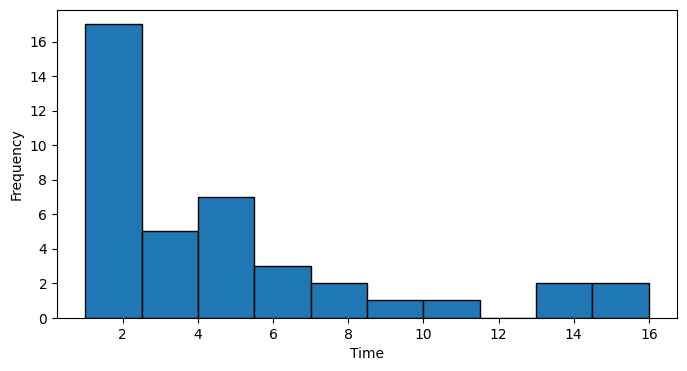

In [11]:
fig = plt.figure(figsize=(8, 4))
plt.hist(wait_time, bins=10, edgecolor='black')

plt.xlabel("Time")
plt.ylabel('Frequency')
plt.show()


## Problem 5
Assume `wait_time` follows an Exponential($\lambda$) model. Compute $\hat\lambda$ using the 40 values.


In [23]:
lambda_hat = 1/np.mean(wait_time)
print(f"Lambda: {lambda_hat}")

Lambda: 0.21978021978021978



## Problem 6
Assume `wait_time` follows a Normal($\mu,\sigma^2$) model. Compute $\hat\mu$ and $\hat\sigma$ (MLEs).


In [16]:
mu_hat = np.mean(wait_time)
sigma_hat = np.std(wait_time)**2
print(f"Mu = {mu_hat}")
print(f"Sigma = {sigma_hat}")

Mu = 4.55
Sigma = 17.797500000000003



## Problem 7

Overlay the fitted **Exponential($\hat\lambda$)** and **Normal($\hat\mu,\hat\sigma$)** densities on the histogram of `wait_time`.


In [18]:
wait = LinearRegression()
wait.fit(wait_time.values.reshape(-1, 1), wait_time)

LinearRegression()

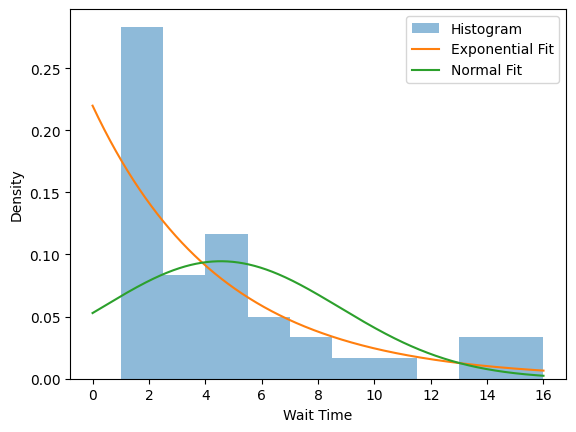

In [24]:
x = np.linspace(0, max(wait_time), 1000)

exp_pdf = expon.pdf(x, scale=1/lambda_hat)
norm_pdf = norm.pdf(x, loc=mu_hat, scale=np.sqrt(sigma_hat))

plt.hist(wait_time, bins=10, density=True, alpha=0.5, label='Histogram')
plt.plot(x, exp_pdf, label='Exponential Fit')
plt.plot(x, norm_pdf, label='Normal Fit')
plt.xlabel('Wait Time')
plt.ylabel('Density')
plt.legend()
plt.show()

## Problem 8

**(a)** Compute **AIC** for both models and state which is preferred (lower is better).



In [27]:
def aic(loglik, k):
    return -2*loglik + 2*k

def log_likelihood_exp(lam, data):
    return np.sum(expon.logpdf(data, scale=1/lam))

def log_likelihood_norm(mu, sigma, data):
    return np.sum(norm.logpdf(data, loc=mu, scale=sigma))

In [28]:
n = 40

loglik_exp = log_likelihood_exp(lambda_hat, wait_time)
loglik_norm = log_likelihood_norm(mu_hat, sigma_hat, wait_time)

aic_exp = aic(loglik_exp, 1)
aic_norm = aic(loglik_norm, 2)

print(f"AIC for Normal: {aic_norm}")
print(f"AIC for Exponential: {aic_exp}")

AIC for Normal: 310.0872291683305
AIC for Exponential: 203.21017863702872


Lower AIC = Exponential

**(b)** Reconcile AIC with the plot in 1–2 sentences.


Based off of the lower AIC and the better fitting line with the plot, the exponential model fits better with the data.


## Problem 9
Using the **preferred model** from Q8 (pick one if you don't know):

**(a)** Find the **90th percentile** and interpret it in context.  


In [30]:
percentile_90 = expon.ppf(0.9, scale=1/lambda_hat)
print(f"90th percentile: {percentile_90}")

90th percentile: 10.476762173122909


**(b)** What percentile corresponds to a wait time of **8 hours**? Show your steps.


In [31]:
percentile_8 = expon.cdf(8, scale=1/lambda_hat)
print(f"8 hour percentile: {percentile_8}")

8 hour percentile: 0.827652373626202



## Problem 10
Fit a linear model predicting `wait_time` using both predictors:
$$ Y = \beta_0 + \beta_1(\text{open\_tickets}) + \beta_2(\text{agent\_experience}) + \epsilon. $$

**(a)** Fit the model and report $\hat\beta_0, \hat\beta_1, \hat\beta_2$.  


In [32]:
x = df[['open_tickets', 'agent_experience']]
y = df['wait_time']

model = LinearRegression()
model.fit(x, y)

beta_0 = model.intercept_
beta_1 = model.coef_[0]
beta_2 = model.coef_[1]

print(f"Beta 0: {beta_0}")
print(f"Beta 1: {beta_1}")
print(f"Beta 2: {beta_2}")

Beta 0: 3.649213393458756
Beta 1: -0.20478415196534003
Beta 2: 0.09237879202153396


**(b)** Interpret $\beta_1$ and $\beta_2$ in context.  


B1 is the expected change in y, wait_time, when the value of open_tickets changes by one, holding all else constant.

B2 is the expected change in the wait time when the value of agent experience changes by one, holding all else constant.


## Problem 11
Fit a regression tree predicting `wait_time` from `open_tickets` and `agent_experience`. Use a max depth of 3.

**(a)** Fit and display the tree.  


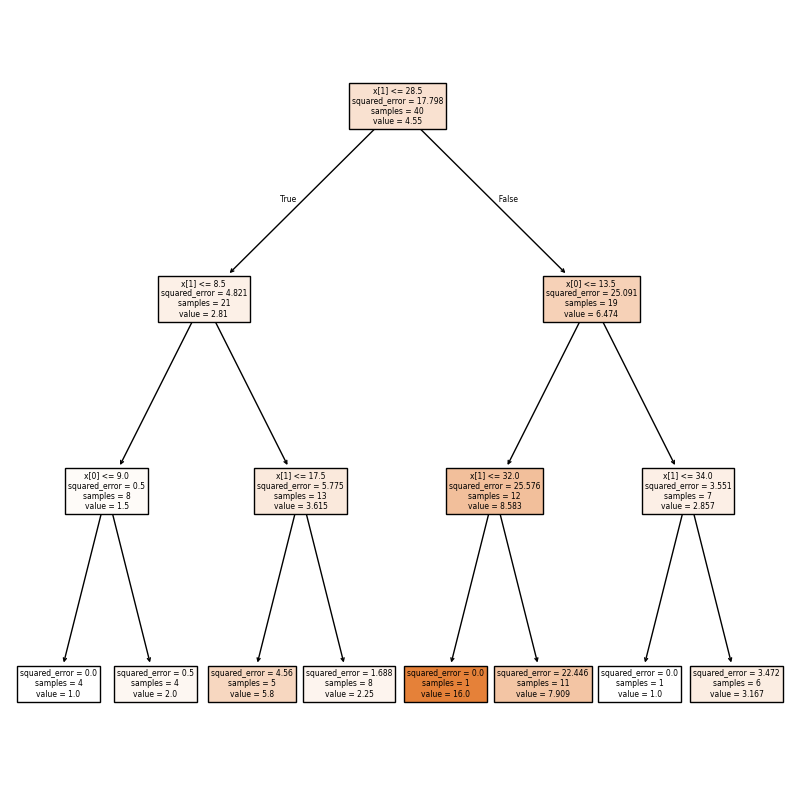

In [34]:
x = df[['open_tickets', 'agent_experience']]
y = df['wait_time']

model = DecisionTreeRegressor(max_depth=3)
model.fit(x, y)

plt.figure(figsize=(10, 10))
tree.plot_tree(model, filled=True)
plt.show()


**(b)** Choose one internal node and describe all four values listed. (Note, you need to use the `tree` package as in the class code to get these values)


Row 3, internal node 2 (from the left)

x[1] <= 17.5 is the predictor, which splits the data into the two nodes below it based on it being True or False.

The Squared error, 5.775, is how spread out the actual values are from the average, or predicted, values in each leaf.

The samples, 13 is how many items from the original dataset fall into that node, following the predictors. In this case, there are 13 of the original 40 in this specific node.

The value, 3.615, is the prediction of the value that one should get if they get to this node through the tree. So, if they end up finding themselves at this node, they should expect a wait time of 3.615.